## Comparative Analysis of Anti-Cancer Drug Regimens

A Case Study on Squamous Cell Carcinoma (SCC)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Load the data
mouse_metadata = pd.read_csv("C:/Matplotlib/data/Mouse_metadata.csv")
study_results = pd.read_csv("C:/Matplotlib/data/Study_results.csv")

# merge the DataFrames
merged_df = pd.merge(mouse_metadata, study_results, how = "right" ,on='Mouse ID')

In [3]:
# Display the number of unique mice IDs
unique_mice = merged_df['Mouse ID'].nunique()
print(f'Number of unique mice: {unique_mice}')

Number of unique mice: 249


In [4]:
# Check for any mouse ID with duplicate time points
duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mouse_id = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [5]:
cleaned_df = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse_id) ==False]

In [6]:
#Cleaned DataFrame
# cleaned_df = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])

#Display
num_unique_mice_cleaned = cleaned_df['Mouse ID'].nunique()
print(f'Number of unique mice after cleaning: {num_unique_mice_cleaned}')

Number of unique mice after cleaning: 248


## Summary Statistics

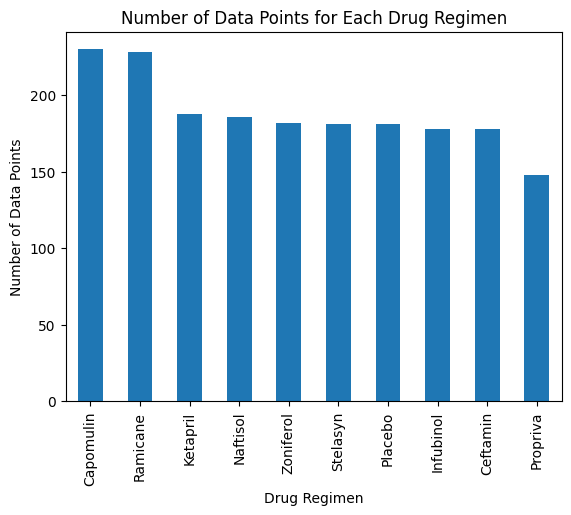

In [7]:
# Plot Pandas DataFrame.plot() Bar Charts
drug_counts = cleaned_df['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', title='Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

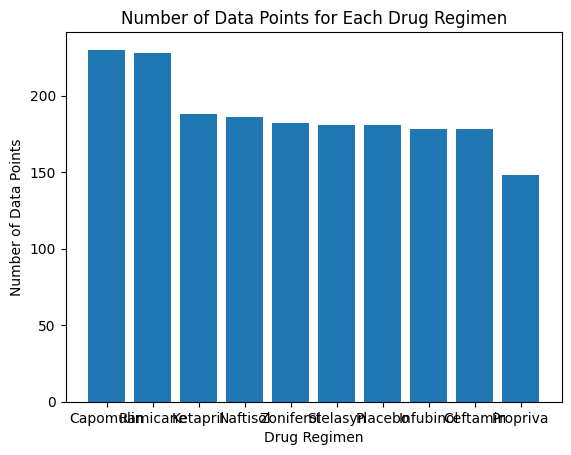

In [8]:
#Plot Matplotlib Pyplot Pie Charts
plt.bar(drug_counts.index.values, drug_counts.values)
plt.title('Number of Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

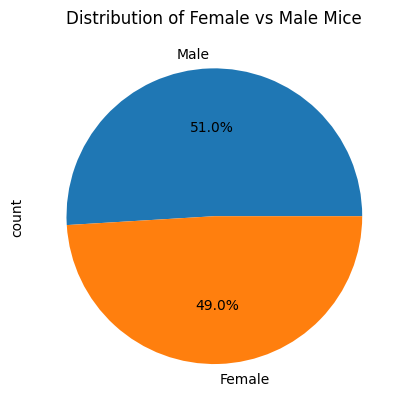

In [9]:
#Plot Pandas DataFrame.plot() Pie Chart
sex_counts = cleaned_df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

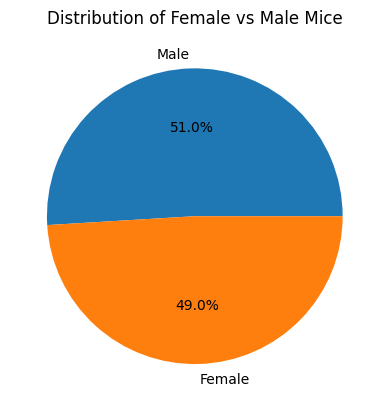

In [10]:
#Matplotlib’s pyplot methods
plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Find Outliers, and Create a Box Plot

In [11]:
#create a grouby DataFrame
max_tumor = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

#Merge the data
merged_data = max_tumor.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

In [12]:
#Create list to hold treaments group
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list = []

#Create list to fill with tumor volume data
for treatment in treatments:
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_volume)
    
#create a  for loop is used to display the interquartile range (IQR) and the outliers for each treatment group
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


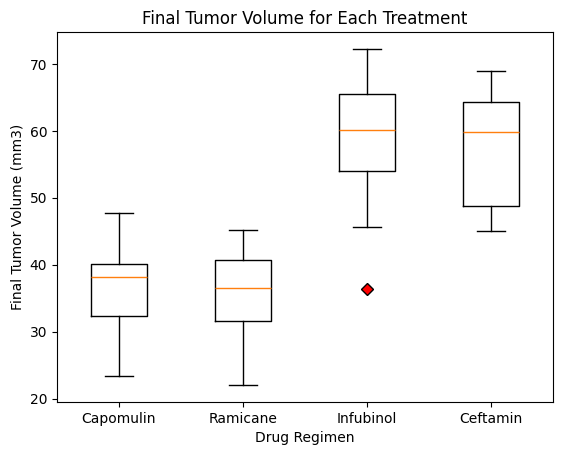

In [13]:
#Generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Each Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))
plt.show()

## Line Plot and Scatter Plot

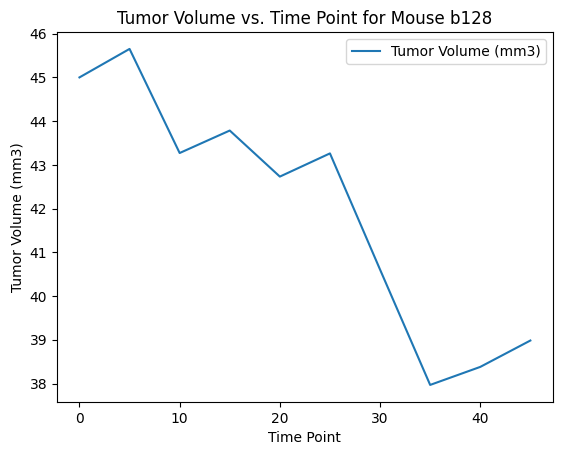

In [14]:
#Select a mouse treated with Capomulin:
mouse_df = cleaned_df.loc[cleaned_df['Mouse ID'] == 'b128']

#Create a line plot showing tumor volumr vs time point for one mouse treated with capamulin
mouse_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.title('Tumor Volume vs. Time Point for Mouse b128')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

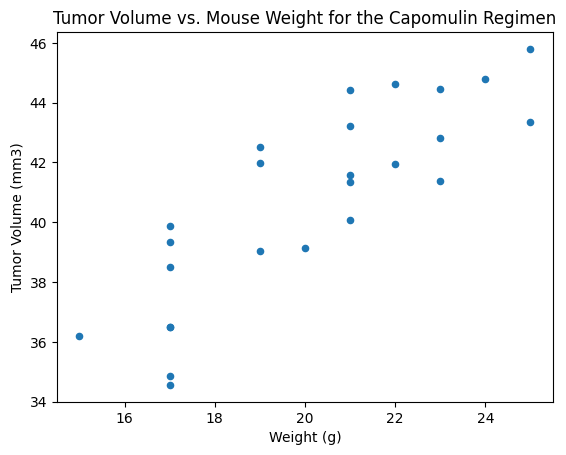

In [16]:
#Create a scatter plot & Calculate the average tumor volume and mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
average_df = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', "Tumor Volume (mm3)"]].mean()

average_df.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.title('Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [17]:
#Calculate the correlation coefficient
correlation = round(st.pearsonr(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])[0],2)
model = st.linregress(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [18]:
model

LinregressResult(slope=0.9609669432428355, intercept=21.489827213299566, rvalue=0.5256995552077169, pvalue=9.605446629501524e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)

In [19]:
# linear regression:
# y = slope * x + intercept (+- error)
slope = model[0]
intercept = model[1]
intercept

21.489827213299566

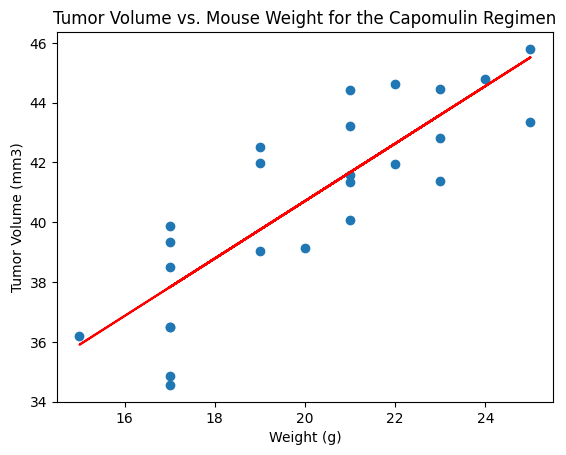

In [20]:
y = average_df["Weight (g)"] * slope + intercept
plt.scatter(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
plt.plot(average_df["Weight (g)"], y, color='red')
plt.title('Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()